Dataset Google Drive Link:

https://drive.google.com/drive/folders/1dOLS5j8qJVTOH-vPK9NqyB9ov_iPzxRT?usp=sharing

In [ ]:
#Drive link

#https://drive.google.com/drive/folders/1dOLS5j8qJVTOH-vPK9NqyB9ov_iPzxRT?usp=sharing

### Augment the dataset (25 points)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Flip and rotate

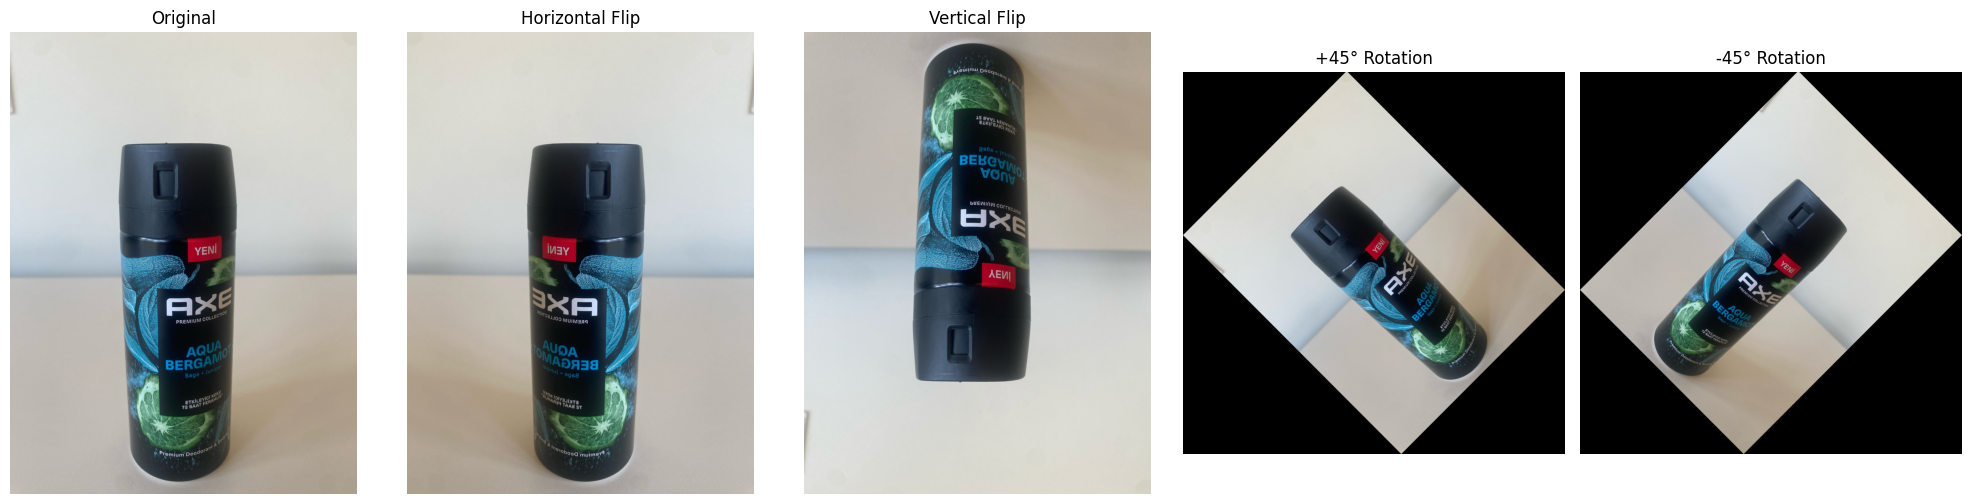

In [ ]:
from PIL import Image, ImageOps
import os
import shutil
import matplotlib.pyplot as plt

# Example image path (update this to your actual path)
image_path = '/content/drive/MyDrive/object1/axe_1.jpeg'
img = Image.open(image_path)

# Augmentations
hflip = ImageOps.mirror(img)
vflip = ImageOps.flip(img)
rot45 = img.rotate(45, expand=True)
rot_45 = img.rotate(-45, expand=True)

# Save outputs
base_path = image_path.replace('.jpeg', '')
hflip.save(base_path + '_hflip.jpeg')
vflip.save(base_path + '_vflip.jpeg')
rot45.save(base_path + '_rot45.jpeg')
rot_45.save(base_path + '_rot-45.jpeg')

# Visualization
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
axs[0].imshow(img)
axs[0].set_title("Original")
axs[1].imshow(hflip)
axs[1].set_title("Horizontal Flip")
axs[2].imshow(vflip)
axs[2].set_title("Vertical Flip")
axs[3].imshow(rot45)
axs[3].set_title("+45° Rotation")
axs[4].imshow(rot_45)
axs[4].set_title("-45° Rotation")

for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()

#### Sharpening and blurring

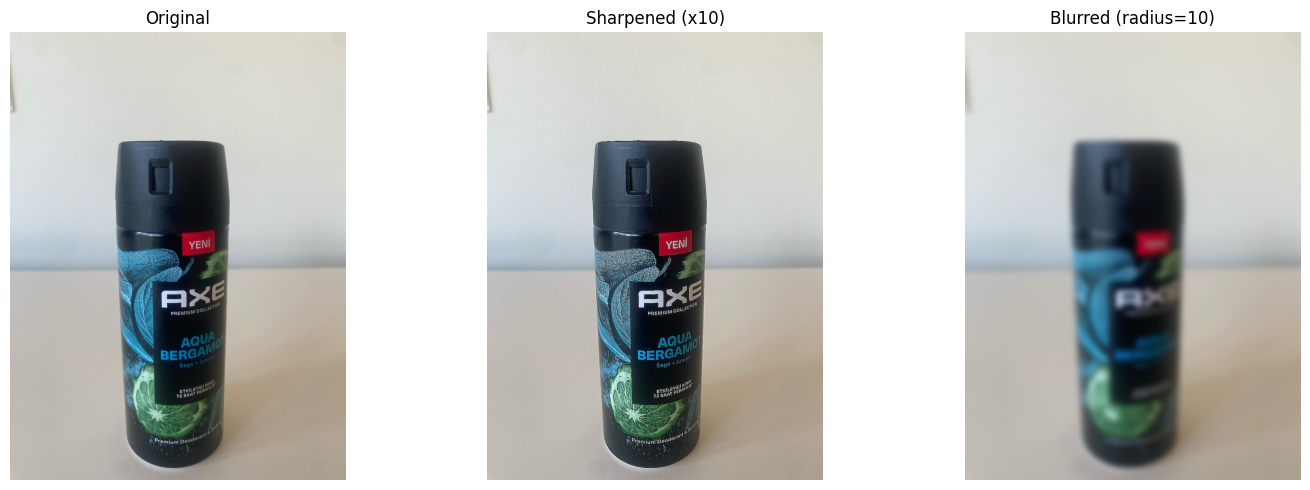

In [ ]:
from PIL import ImageEnhance, ImageFilter
import matplotlib.pyplot as plt

# Enhanced sharpen using ImageEnhance
sharpened = ImageEnhance.Sharpness(img).enhance(10.0)  # Boost sharpness (2.0 is okay too)
sharpened.save(image_path.replace('.jpeg', '_sharpen.jpeg'))

# Stronger blur
blurred = img.filter(ImageFilter.GaussianBlur(radius=10))  # More noticeable blur
blurred.save(image_path.replace('.jpeg', '_blur.jpeg'))

# Visualization
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img)
axs[0].set_title("Original")
axs[1].imshow(sharpened)
axs[1].set_title("Sharpened (x10)")
axs[2].imshow(blurred)
axs[2].set_title("Blurred (radius=10)")

for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()

#### Brighten and darken

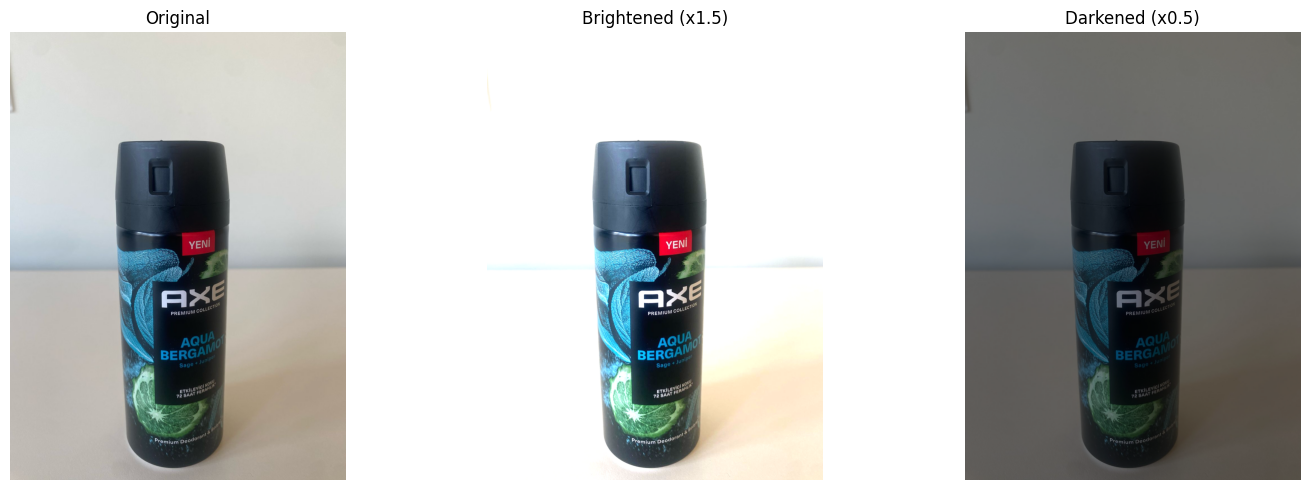

In [ ]:
from PIL import ImageEnhance
import matplotlib.pyplot as plt

# Brighten
bright_img = ImageEnhance.Brightness(img).enhance(1.5)
bright_img.save(image_path.replace('.jpeg', '_bright.jpeg'))

# Darken
dark_img = ImageEnhance.Brightness(img).enhance(0.5)
dark_img.save(image_path.replace('.jpeg', '_dark.jpeg'))

# Visualization
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img)
axs[0].set_title("Original")
axs[1].imshow(bright_img)
axs[1].set_title("Brightened (x1.5)")
axs[2].imshow(dark_img)
axs[2].set_title("Darkened (x0.5)")

for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()


#### Hue

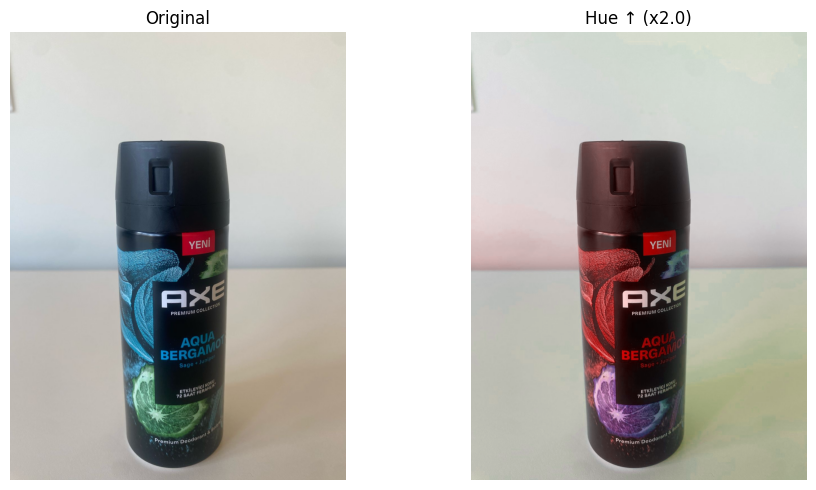

In [ ]:
import numpy as np
from PIL import Image

# Function to increase hue only
def adjust_hue(img, hue_factor=2):
    hsv = img.convert('HSV')
    np_img = np.array(hsv, dtype=np.uint8)

    # Adjust hue (channel 0)
    np_img[..., 0] = np.clip(np_img[..., 0].astype(np.float32) * hue_factor, 0, 255).astype(np.uint8)

    adjusted = Image.fromarray(np_img, mode='HSV').convert('RGB')
    return adjusted

# Apply hue increase
hue_img = adjust_hue(img, hue_factor=2)
hue_img.save(image_path.replace('.jpeg', '_hue.jpeg'))

# Visualize
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img)
axs[0].set_title("Original")
axs[1].imshow(hue_img)
axs[1].set_title("Hue ↑ (x2.0)")

for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()

#### Saturation

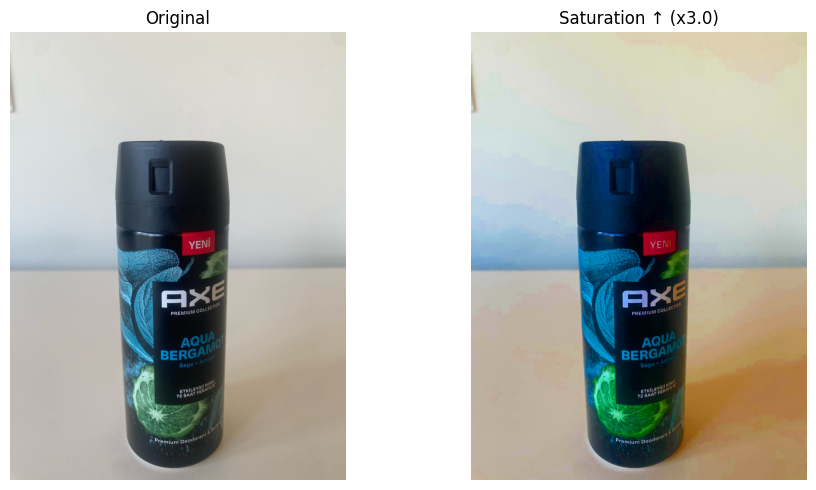

In [ ]:
# Function to increase saturation only
def adjust_saturation(img, sat_factor=3.0):
    hsv = img.convert('HSV')
    np_img = np.array(hsv, dtype=np.uint8)

    # Adjust saturation (channel 1)
    np_img[..., 1] = np.clip(np_img[..., 1].astype(np.float32) * sat_factor, 0, 255).astype(np.uint8)

    adjusted = Image.fromarray(np_img, mode='HSV').convert('RGB')
    return adjusted

# Apply saturation increase
sat_img = adjust_saturation(img, sat_factor=3.0)
sat_img.save(image_path.replace('.jpeg', '_sat.jpeg'))

# Visualize
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img)
axs[0].set_title("Original")
axs[1].imshow(sat_img)
axs[1].set_title("Saturation ↑ (x3.0)")

for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()


### Train models (30 points)

In [ ]:
# Required once at the top of your notebook
!pip install torch torchvision matplotlib opencv-python
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import os
import shutil
import random

# Paths
base_path = "/content/drive/MyDrive/EE417_dataset/all_data"
target_path = "/content/drive/MyDrive/EE417_dataset/data"

# Ensure clean folders
for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(target_path, 'images', split), exist_ok=True)
    os.makedirs(os.path.join(target_path, 'labels', split), exist_ok=True)

# Group by object type
object_groups = {'axe': [], 'mouse': []}

for file in os.listdir(os.path.join(base_path, "images")):
    if file.endswith(".jpeg"):
        if file.startswith("axe"):
            object_groups['axe'].append(file)
        elif file.startswith("mouse"):
            object_groups['mouse'].append(file)

# Stratified split function
def stratified_split(obj_list):
    random.shuffle(obj_list)
    n = len(obj_list)
    train = obj_list[:int(0.6*n)]
    val = obj_list[int(0.6*n):int(0.8*n)]
    test = obj_list[int(0.8*n):]
    return {'train': train, 'val': val, 'test': test}

# Split each group
final_splits = {'train': [], 'val': [], 'test': []}

for obj_type, files in object_groups.items():
    split_result = stratified_split(files)
    for split in ['train', 'val', 'test']:
        final_splits[split].extend(split_result[split])

# Copy to folders
for split, files in final_splits.items():
    for img_file in files:
        xml_file = img_file.replace('.jpeg', '.xml')

        src_img = os.path.join(base_path, "images", img_file)
        src_xml = os.path.join(base_path, "labels", xml_file)

        dst_img = os.path.join(target_path, "images", split, img_file)
        dst_xml = os.path.join(target_path, "labels", split, xml_file)

        if os.path.exists(src_img) and os.path.exists(src_xml):
            shutil.copy(src_img, dst_img)
            shutil.copy(src_xml, dst_xml)
        else:
            print(f"⚠️ Missing file: {img_file} or {xml_file}")

print("✅ Stratified split complete! You now have balanced train/val/test sets.")


✅ Stratified split complete! You now have balanced train/val/test sets.


In [ ]:
import os
import xml.etree.ElementTree as ET
from PIL import Image

# Define the two class names in order: 0 = axe, 1 = mouse
class_names = ['axe', 'mouse']

# Base path
base_path = "/content/drive/MyDrive/EE417_dataset/data"

# Function to convert a single XML to YOLO TXT
def convert_xml_to_yolo(xml_path, txt_path, img_width, img_height):
    tree = ET.parse(xml_path)
    root = tree.getroot()

    with open(txt_path, 'w') as f:
        for obj in root.findall('object'):
            cls_name = obj.find('name').text
            if cls_name not in class_names:
                continue
            cls_id = class_names.index(cls_name)

            xmlbox = obj.find('bndbox')
            xmin = int(xmlbox.find('xmin').text)
            ymin = int(xmlbox.find('ymin').text)
            xmax = int(xmlbox.find('xmax').text)
            ymax = int(xmlbox.find('ymax').text)

            # Convert to YOLO format
            x_center = ((xmin + xmax) / 2) / img_width
            y_center = ((ymin + ymax) / 2) / img_height
            width = (xmax - xmin) / img_width
            height = (ymax - ymin) / img_height

            f.write(f"{cls_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

# Loop through all splits and convert
for split in ['train', 'val', 'test']:
    label_dir = os.path.join(base_path, 'labels', split)
    image_dir = os.path.join(base_path, 'images', split)

    for xml_file in os.listdir(label_dir):
        if not xml_file.endswith('.xml'):
            continue

        xml_path = os.path.join(label_dir, xml_file)
        img_file = xml_file.replace('.xml', '.jpeg')
        img_path = os.path.join(image_dir, img_file)

        if not os.path.exists(img_path):
            print(f"⚠️ Image not found for: {img_file}")
            continue

        with Image.open(img_path) as img:
            w, h = img.size

        txt_path = xml_path.replace('.xml', '.txt')
        convert_xml_to_yolo(xml_path, txt_path, w, h)

print("✅ XML to YOLO TXT conversion complete!")


✅ XML to YOLO TXT conversion complete!


#### Fine Tune: One Stage Detector

In [ ]:
yaml_content = """
train: /content/drive/MyDrive/EE417_dataset/data/images/train
val: /content/drive/MyDrive/EE417_dataset/data/images/val

nc: 2
names: ['axe', 'mouse']
"""

# Save to file
with open('/content/drive/MyDrive/EE417_dataset/data.yaml', 'w') as f:
    f.write(yaml_content.strip())

print("✅ data.yaml created!")

✅ data.yaml created!


In [ ]:
!python train.py \
  --img 416 \
  --batch 16 \
  --epochs 30 \
  --data /content/drive/MyDrive/EE417_dataset/data.yaml \
  --weights yolov5s.pt \
  --name yolov5_finetuned

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-04-19 23:18:00.604616: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745104680.846083    2833 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745104680.914716    2833 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

In [ ]:
yaml_content = """
train: /content/drive/MyDrive/EE417_dataset/data/images/train
val: /content/drive/MyDrive/EE417_dataset/data/images/val
test: /content/drive/MyDrive/EE417_dataset/data/images/test

nc: 2
names: ['axe', 'mouse']
"""

with open('/content/drive/MyDrive/EE417_dataset/data.yaml', 'w') as f:
    f.write(yaml_content.strip())

print("✅ data.yaml updated with test path!")

✅ data.yaml updated with test path!


In [ ]:
!python detect.py \
  --weights runs/train/yolov5_finetuned/weights/best.pt \
  --source /content/drive/MyDrive/EE417_dataset/data/images/test \
  --conf 0.25 \
  --img 416 \
  --save-txt \
  --save-conf \
  --name yolov5_finetuned_preds

detect: weights=['runs/train/yolov5_finetuned/weights/best.pt'], source=/content/drive/MyDrive/EE417_dataset/data/images/test, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolov5_finetuned_preds, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/19 /content/drive/MyDrive/EE417_dataset/data/images/test/axe_1.jpeg: 416x320 (no detections), 27.2ms
image 2/19 /content/drive/MyDrive/EE417_dataset/data/images/test/axe_10.jpeg: 416x320 1 axe, 6.6ms
image 3/19 /content/drive/MyDrive/EE417_da

In [ ]:
!python val.py \
  --data /content/drive/MyDrive/EE417_dataset/data.yaml \
  --weights runs/train/yolov5_finetuned/weights/best.pt \
  --task test \
  --img 416 \
  --name yolov5_finetuned_eval


val: data=/content/drive/MyDrive/EE417_dataset/data.yaml, weights=['runs/train/yolov5_finetuned/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=yolov5_finetuned_eval, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /content/drive/MyDrive/EE417_dataset/data/labels/test... 19 images, 0 backgrounds, 0 corrupt: 100% 19/19 [00:00<00:00, 141.40it/s]
test: New cache created: /content/drive/MyDrive/EE417_dataset/data/labels/test.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:01<00:00,  1.87s/it]
                   all         19         19  

#### Fine tune: Two Stage Detector

In [ ]:
import torch
import torchvision
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torch.utils.data import DataLoader, Dataset
import os
from PIL import Image
import xml.etree.ElementTree as ET

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Your dataset class (Pascal VOC format)
class CustomDataset(Dataset):
    def __init__(self, images_dir, annotations_dir, transforms=None):
        self.images_dir = images_dir
        self.annotations_dir = annotations_dir
        self.transforms = transforms
        self.image_files = sorted([f for f in os.listdir(images_dir) if f.endswith(".jpeg")])

    def __getitem__(self, idx):
        img_path = os.path.join(self.images_dir, self.image_files[idx])
        annotation_path = os.path.join(self.annotations_dir, self.image_files[idx].replace(".jpeg", ".xml"))

        # Load image
        img = Image.open(img_path).convert("RGB")
        img_w, img_h = img.size

        # Parse XML
        tree = ET.parse(annotation_path)
        root = tree.getroot()
        boxes, labels = [], []
        for obj in root.findall("object"):
            label = obj.find("name").text
            label_id = 1 if label == "axe" else 2
            bndbox = obj.find("bndbox")
            box = [
                int(bndbox.find("xmin").text),
                int(bndbox.find("ymin").text),
                int(bndbox.find("xmax").text),
                int(bndbox.find("ymax").text)
            ]
            boxes.append(box)
            labels.append(label_id)

        # Convert to tensor
        boxes = torch.tensor(boxes, dtype=torch.float32)
        labels = torch.tensor(labels, dtype=torch.int64)
        target = {
            "boxes": boxes,
            "labels": labels,
            "image_id": torch.tensor([idx])
        }

        if self.transforms:
            img = self.transforms(img)

        return img, target

    def __len__(self):
        return len(self.image_files)

# Paths to your training data
images_dir = "/content/drive/MyDrive/EE417_dataset/data/images/train"
annotations_dir = "/content/drive/MyDrive/EE417_dataset/data/labels/train"

# Transforms
transform = T.Compose([
    T.ToTensor()
])

# Load dataset
dataset = CustomDataset(images_dir, annotations_dir, transforms=transform)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))

# Load pretrained Faster R-CNN
model = fasterrcnn_resnet50_fpn(weights="DEFAULT")  # pretrained backbone
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes=3)  # BG + axe + mouse
model.to(device)

# Optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)

# Train loop
num_epochs = 15
model.train()
for epoch in range(num_epochs):
    total_loss = 0.0
    for images, targets in dataloader:
        images = list(img.to(device) for img in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        total_loss += losses.item()

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

    avg_loss = total_loss / len(dataloader)
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {avg_loss:.4f}")

# Save model
torch.save(model.state_dict(), "/content/drive/MyDrive/EE417_dataset/faster_rcnn_finetuned.pth")
print("✅ Fine-tuned model saved!")


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 129MB/s]


Epoch 1/15 - Loss: 0.3153
Epoch 2/15 - Loss: 0.1215
Epoch 3/15 - Loss: 0.0707
Epoch 4/15 - Loss: 0.0579
Epoch 5/15 - Loss: 0.0528
Epoch 6/15 - Loss: 0.0465
Epoch 7/15 - Loss: 0.0483
Epoch 8/15 - Loss: 0.0406
Epoch 9/15 - Loss: 0.0300
Epoch 10/15 - Loss: 0.0287
Epoch 11/15 - Loss: 0.0292
Epoch 12/15 - Loss: 0.0291
Epoch 13/15 - Loss: 0.0250
Epoch 14/15 - Loss: 0.0254
Epoch 15/15 - Loss: 0.0208
✅ Fine-tuned model saved!


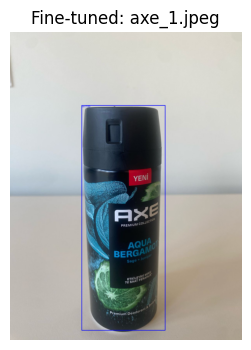

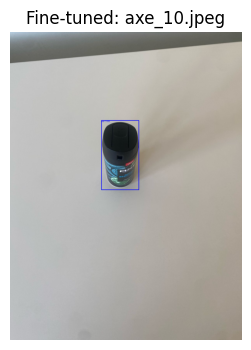

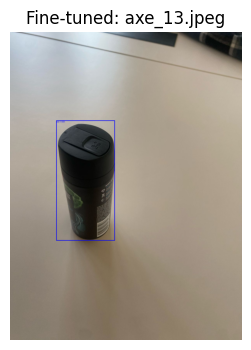

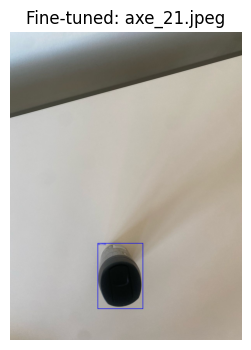

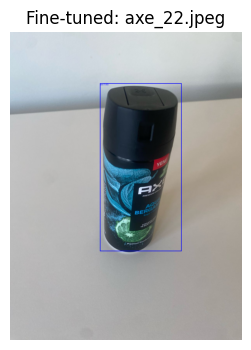

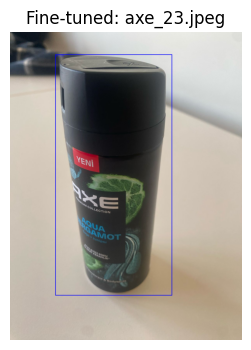

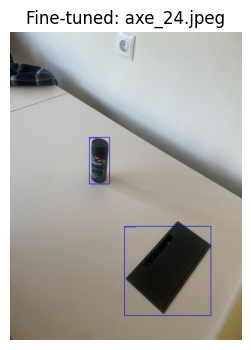

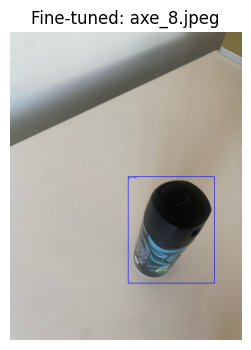

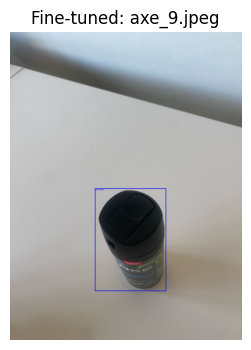

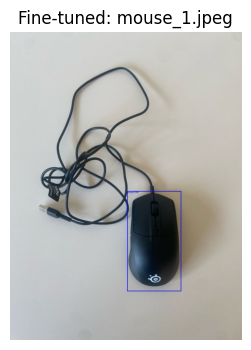

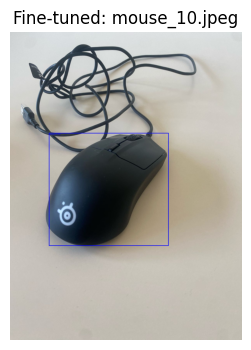

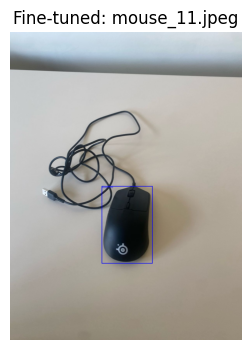

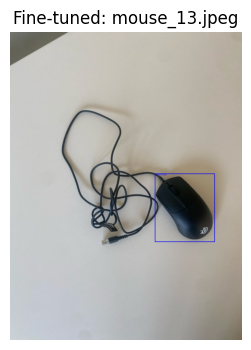

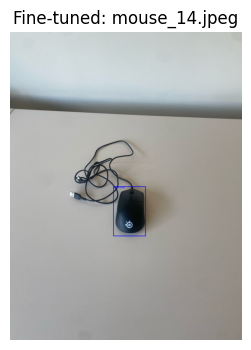

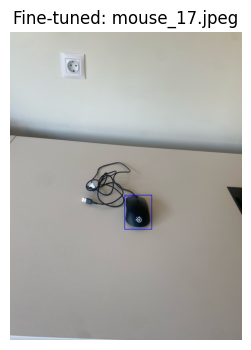

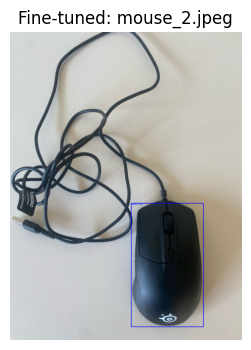

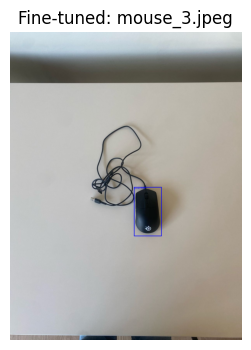

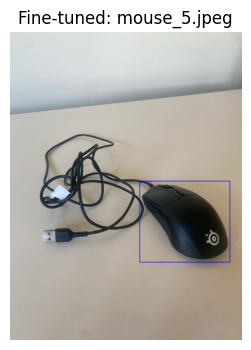

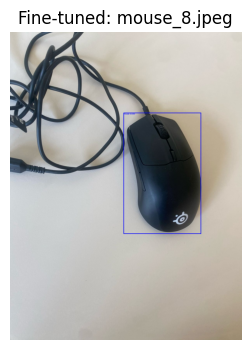

In [ ]:
import matplotlib.pyplot as plt
from PIL import ImageDraw

# Load fine-tuned model
model = fasterrcnn_resnet50_fpn(weights="DEFAULT")
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes=3)
model.load_state_dict(torch.load("/content/drive/MyDrive/EE417_dataset/faster_rcnn_finetuned.pth"))
model.eval().to(device)

# Inference on test set
test_img_dir = "/content/drive/MyDrive/EE417_dataset/data/images/test"
test_images = sorted([f for f in os.listdir(test_img_dir) if f.endswith(".jpeg")])
labels_map = {1: "axe", 2: "mouse"}

for img_name in test_images:
    img_path = os.path.join(test_img_dir, img_name)
    img = Image.open(img_path).convert("RGB")
    img_tensor = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        prediction = model(img_tensor)[0]

    draw = ImageDraw.Draw(img)
    for box, label, score in zip(prediction["boxes"], prediction["labels"], prediction["scores"]):
        if score >= 0.5:
            box = box.cpu().numpy()
            draw.rectangle(box.tolist(), outline="blue", width=3)
            draw.text((box[0], box[1]), f"{labels_map[label.item()]} ({score:.2f})", fill="blue")

    plt.figure(figsize=(6, 4))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Fine-tuned: {img_name}")
    plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Load fine-tuned model
model = fasterrcnn_resnet50_fpn(weights="DEFAULT")
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes=3)
model.load_state_dict(torch.load("/content/drive/MyDrive/EE417_dataset/faster_rcnn_finetuned.pth"))
model.eval().to(device)

# Evaluation lists
y_true_all = []
y_pred_all = []

for filename in sorted(os.listdir(gt_folder)):
    if not filename.endswith(".xml"): continue

    img_name = filename.replace(".xml", ".jpeg")
    img_path = os.path.join(img_folder, img_name)
    xml_path = os.path.join(gt_folder, filename)

    img = Image.open(img_path).convert("RGB")
    img_tensor = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        pred = model(img_tensor)[0]

    gt_boxes, gt_labels = parse_ground_truth(xml_path)
    pred_boxes = pred["boxes"].cpu().numpy()
    pred_labels = pred["labels"].cpu().numpy()
    pred_scores = pred["scores"].cpu().numpy()

    matched = [False] * len(gt_boxes)

    for p_box, p_label, p_score in zip(pred_boxes, pred_labels, pred_scores):
        if p_score < 0.5: continue
        best_iou, best_j = 0, -1
        for j, gt_box in enumerate(gt_boxes):
            if matched[j]: continue
            iou = compute_iou(p_box, gt_box)
            if iou > best_iou:
                best_iou = iou
                best_j = j
        if best_iou >= 0.5:
            y_true_all.append(gt_labels[best_j])
            y_pred_all.append(p_label)
            matched[best_j] = True
        else:
            y_pred_all.append(p_label)
            y_true_all.append(0)

    for k, matched_flag in enumerate(matched):
        if not matched_flag:
            y_true_all.append(gt_labels[k])
            y_pred_all.append(0)

# 📈 Final Scores
print("📊 Evaluation for Fine-Tuned Faster R-CNN:")
print("Precision:", precision_score(y_true_all, y_pred_all, average='macro'))
print("Recall:", recall_score(y_true_all, y_pred_all, average='macro'))
print("F1 Score:", f1_score(y_true_all, y_pred_all, average='macro'))
print("Confusion Matrix:")
print(confusion_matrix(y_true_all, y_pred_all))


📊 Evaluation for Fine-Tuned Faster R-CNN:
Precision: 0.6363636363636364
Recall: 0.6666666666666666
F1 Score: 0.6507936507936508
Confusion Matrix:
[[ 0  0  1]
 [ 0  9  0]
 [ 0  0 10]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### From Scratch: One Stage Detector

In [ ]:
!python train.py \
  --img 416 \
  --batch 16 \
  --epochs 30 \
  --data /content/drive/MyDrive/EE417_dataset/data.yaml \
  --cfg models/yolov5s.yaml \
  --weights '' \
  --name yolov5_scratch


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-04-19 23:33:24.467918: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745105604.499729    6928 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745105604.512456    6928 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&

In [ ]:
!python detect.py \
  --weights runs/train/yolov5_scratch/weights/best.pt \
  --source /content/drive/MyDrive/EE417_dataset/data/images/test \
  --conf 0.05 \
  --img 416 \
  --save-txt \
  --save-conf \
  --name yolov5_scratch_preds

detect: weights=['runs/train/yolov5_scratch/weights/best.pt'], source=/content/drive/MyDrive/EE417_dataset/data/images/test, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.05, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolov5_scratch_preds, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/19 /content/drive/MyDrive/EE417_dataset/data/images/test/axe_1.jpeg: 416x320 (no detections), 27.8ms
image 2/19 /content/drive/MyDrive/EE417_dataset/data/images/test/axe_10.jpeg: 416x320 (no detections), 6.3ms
image 3/19 /content/drive/MyDrive/

In [ ]:
!python val.py \
  --data /content/drive/MyDrive/EE417_dataset/data.yaml \
  --weights runs/train/yolov5_scratch/weights/best.pt \
  --task test \
  --img 416 \
  --name yolov5_scratch_eval

val: data=/content/drive/MyDrive/EE417_dataset/data.yaml, weights=['runs/train/yolov5_scratch/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=yolov5_scratch_eval, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /content/drive/MyDrive/EE417_dataset/data/labels/test.cache... 19 images, 0 backgrounds, 0 corrupt: 100% 19/19 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:01<00:00,  1.75s/it]
                   all         19         19    0.00211      0.628     0.0154    0.00371
                   axe         19          9   

#### From Scratch: Two Stage Detector

In [ ]:
!pip install torch torchvision


In [ ]:
import os
import numpy as np
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.datasets import VOCDetection
from torchvision.transforms import functional as F
from torch.utils.data import DataLoader
from PIL import Image
import xml.etree.ElementTree as ET

# Custom Dataset class for your labeled data
class CustomVOC(torch.utils.data.Dataset):
    def __init__(self, image_dir, label_dir, transforms=None):
        self.image_dir = image_dir
        self.label_dir = label_dir
        self.transforms = transforms
        self.images = sorted([file for file in os.listdir(image_dir) if file.endswith(".jpeg")])

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.images[idx])
        label_path = os.path.join(self.label_dir, self.images[idx].replace(".jpeg", ".xml"))

        img = Image.open(img_path).convert("RGB")

        # Parse the XML annotation
        tree = ET.parse(label_path)
        root = tree.getroot()

        boxes = []
        labels = []
        for obj in root.findall("object"):
            name = obj.find("name").text
            labels.append(1 if name == "axe" else 2)
            bbox = obj.find("bndbox")
            box = [
                int(bbox.find("xmin").text),
                int(bbox.find("ymin").text),
                int(bbox.find("xmax").text),
                int(bbox.find("ymax").text),
            ]
            boxes.append(box)

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)

        target = {"boxes": boxes, "labels": labels, "image_id": torch.tensor([idx])}

        if self.transforms:
            img = self.transforms(img)

        return img, target

    def __len__(self):
        return len(self.images)

# Paths
image_path = "/content/drive/MyDrive/EE417_dataset/data/images/train"
label_path = "/content/drive/MyDrive/EE417_dataset/data/labels/train"

# Dataset and DataLoader
dataset = CustomVOC(image_path, label_path, transforms=F.to_tensor)
data_loader = DataLoader(dataset, batch_size=2, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))

# Load Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=False)
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes=3)  # 2 classes + background

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)

# Train for 15 epochs
num_epochs = 15
model.train()
for epoch in range(num_epochs):
    for imgs, targets in data_loader:
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(imgs, targets)
        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {losses.item():.4f}")

# Save model
torch.save(model.state_dict(), "/content/drive/MyDrive/EE417_dataset/faster_rcnn_scratch.pth")


Epoch 1/15 - Loss: 0.1737
Epoch 2/15 - Loss: 0.1812
Epoch 3/15 - Loss: 0.2088
Epoch 4/15 - Loss: 0.1125
Epoch 5/15 - Loss: 0.1156
Epoch 6/15 - Loss: 0.0706
Epoch 7/15 - Loss: 0.1232
Epoch 8/15 - Loss: 0.1927
Epoch 9/15 - Loss: 0.1277
Epoch 10/15 - Loss: 0.0775
Epoch 11/15 - Loss: 0.0617
Epoch 12/15 - Loss: 0.0684
Epoch 13/15 - Loss: 0.0379
Epoch 14/15 - Loss: 0.0633
Epoch 15/15 - Loss: 0.0409


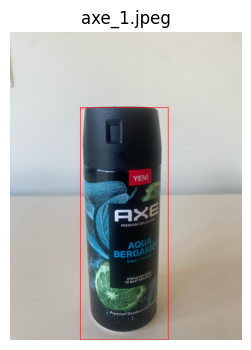

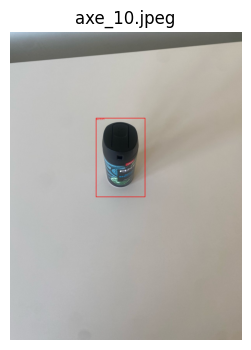

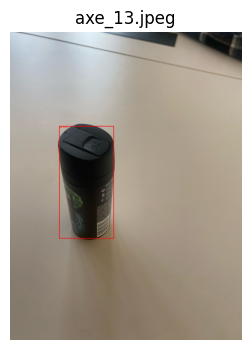

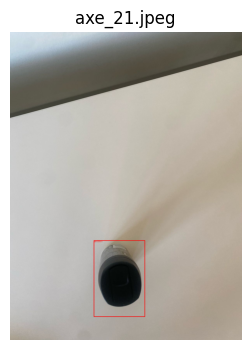

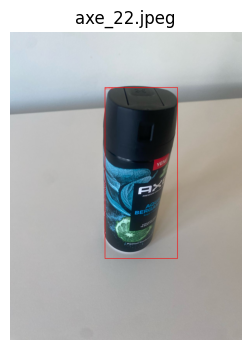

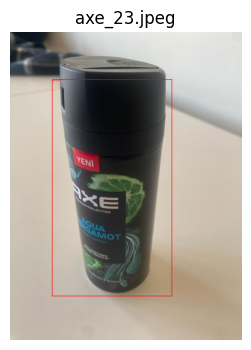

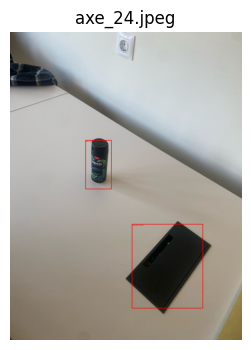

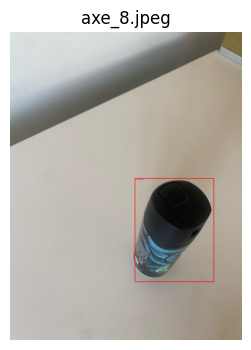

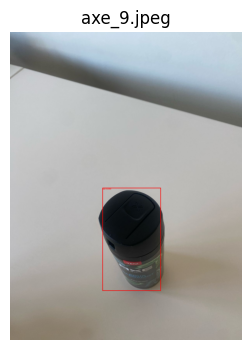

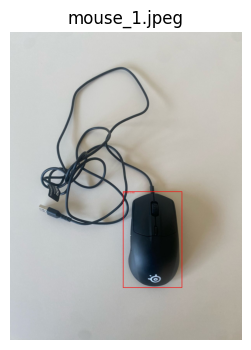

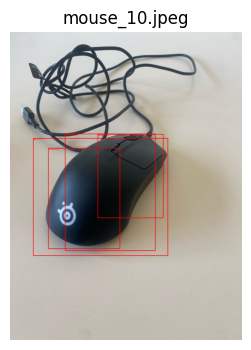

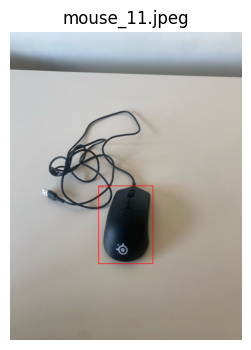

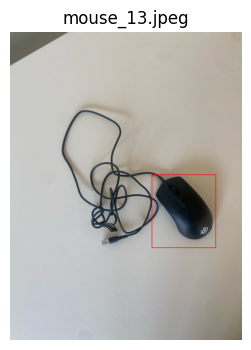

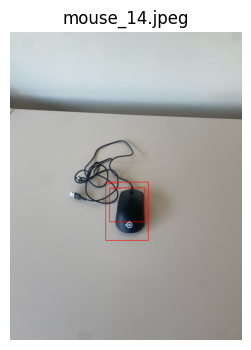

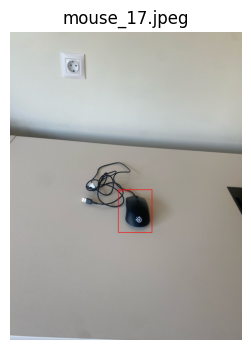

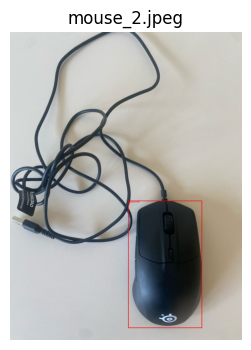

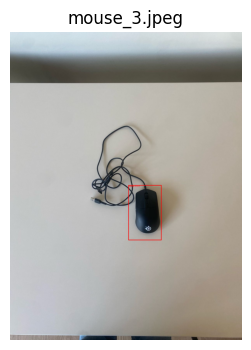

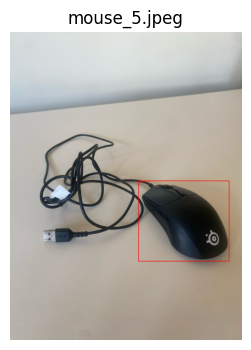

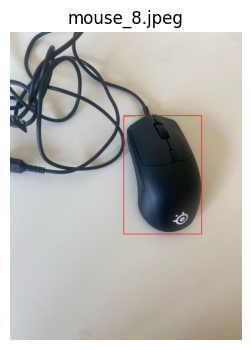

In [ ]:
import torch
from PIL import Image, ImageDraw
import torchvision.transforms as T
import os
import matplotlib.pyplot as plt

# Load model
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

model = fasterrcnn_resnet50_fpn(weights=None)  # from scratch
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes=3)
model.load_state_dict(torch.load("/content/drive/MyDrive/EE417_dataset/faster_rcnn_scratch.pth"))
model.eval().to("cuda" if torch.cuda.is_available() else "cpu")

# Define transforms
transform = T.Compose([
    T.ToTensor()
])

# Path to test images
test_img_dir = "/content/drive/MyDrive/EE417_dataset/data/images/test"
test_images = sorted([f for f in os.listdir(test_img_dir) if f.endswith(".jpeg")])

# Map class indices to labels
labels_map = {1: "axe", 2: "mouse"}

# Inference loop
for img_name in test_images:
    img_path = os.path.join(test_img_dir, img_name)
    img = Image.open(img_path).convert("RGB")
    img_tensor = transform(img).unsqueeze(0).to("cuda" if torch.cuda.is_available() else "cpu")

    with torch.no_grad():
        prediction = model(img_tensor)[0]

    draw = ImageDraw.Draw(img)
    for box, label, score in zip(prediction["boxes"], prediction["labels"], prediction["scores"]):
        if score >= 0.5:
            box = box.cpu().numpy()
            draw.rectangle(box.tolist(), outline="red", width=3)
            draw.text((box[0], box[1]), f"{labels_map[label.item()]} ({score:.2f})", fill="red")

    # Show or save image
    plt.figure(figsize=(6, 4))
    plt.imshow(img)
    plt.axis("off")
    plt.title(img_name)
    plt.show()


In [ ]:
import os
import xml.etree.ElementTree as ET
import torch
from PIL import Image
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Paths
gt_folder = "/content/drive/MyDrive/EE417_dataset/data/labels/test"  # ground-truth .xmls
img_folder = "/content/drive/MyDrive/EE417_dataset/data/images/test"
label_map = {1: "axe", 2: "mouse"}

# Load model
model = fasterrcnn_resnet50_fpn(weights=None)
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes=3)
model.load_state_dict(torch.load("/content/drive/MyDrive/EE417_dataset/faster_rcnn_scratch.pth"))
model.eval().to("cuda" if torch.cuda.is_available() else "cpu")

transform = T.Compose([T.ToTensor()])

def parse_ground_truth(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()
    boxes, labels = [], []
    for obj in root.findall("object"):
        label = obj.find("name").text
        labels.append(1 if label == "axe" else 2)
        bndbox = obj.find("bndbox")
        box = [
            int(bndbox.find("xmin").text),
            int(bndbox.find("ymin").text),
            int(bndbox.find("xmax").text),
            int(bndbox.find("ymax").text)
        ]
        boxes.append(box)
    return boxes, labels


In [ ]:
def compute_iou(box1, box2):
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])
    interArea = max(0, xB - xA) * max(0, yB - yA)
    boxAArea = (box1[2] - box1[0]) * (box1[3] - box1[1])
    boxBArea = (box2[2] - box2[0]) * (box2[3] - box2[1])
    iou = interArea / float(boxAArea + boxBArea - interArea + 1e-6)
    return iou

y_true_all = []
y_pred_all = []

for filename in sorted(os.listdir(gt_folder)):
    if not filename.endswith(".xml"): continue

    img_name = filename.replace(".xml", ".jpeg")
    img_path = os.path.join(img_folder, img_name)
    xml_path = os.path.join(gt_folder, filename)

    img = Image.open(img_path).convert("RGB")
    img_tensor = transform(img).unsqueeze(0).to("cuda" if torch.cuda.is_available() else "cpu")

    with torch.no_grad():
        pred = model(img_tensor)[0]

    gt_boxes, gt_labels = parse_ground_truth(xml_path)
    pred_boxes = pred["boxes"].cpu().numpy()
    pred_labels = pred["labels"].cpu().numpy()
    pred_scores = pred["scores"].cpu().numpy()

    matched = [False] * len(gt_boxes)

    for i, (p_box, p_label, p_score) in enumerate(zip(pred_boxes, pred_labels, pred_scores)):
        if p_score < 0.5: continue
        best_iou = 0
        best_j = -1
        for j, gt_box in enumerate(gt_boxes):
            if matched[j]: continue
            iou = compute_iou(p_box, gt_box)
            if iou > best_iou:
                best_iou = iou
                best_j = j
        if best_iou >= 0.5:
            y_true_all.append(gt_labels[best_j])
            y_pred_all.append(p_label)
            matched[best_j] = True
        else:
            y_pred_all.append(p_label)
            y_true_all.append(0)  # background or wrong

    for k, matched_flag in enumerate(matched):
        if not matched_flag:
            y_true_all.append(gt_labels[k])
            y_pred_all.append(0)  # missed detection

# Metrics
print("Precision:", precision_score(y_true_all, y_pred_all, average='macro'))
print("Recall:", recall_score(y_true_all, y_pred_all, average='macro'))
print("F1 Score:", f1_score(y_true_all, y_pred_all, average='macro'))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true_all, y_pred_all))


Precision: 0.5380952380952381
Recall: 0.6666666666666666
F1 Score: 0.5935672514619883
Confusion Matrix:
[[ 0  1  4]
 [ 0  9  0]
 [ 0  0 10]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Infer the models (10 points)

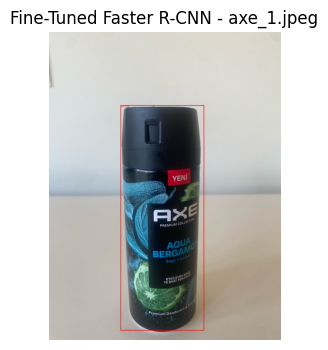

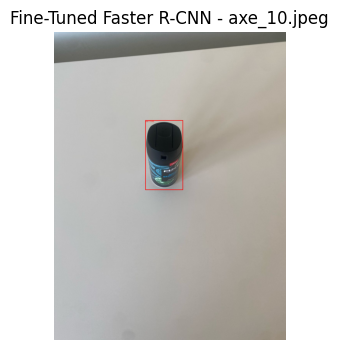

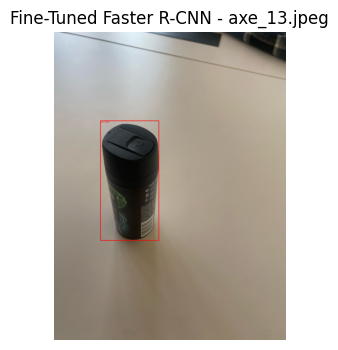

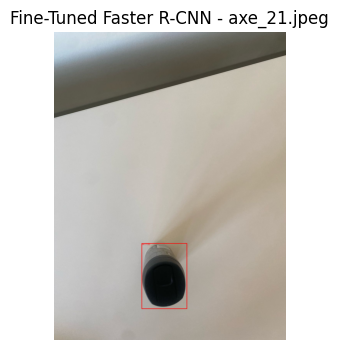

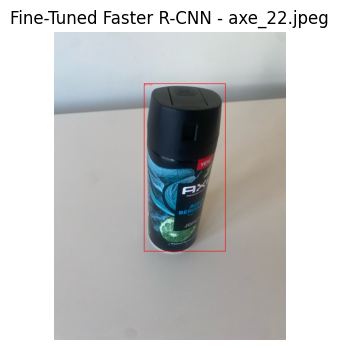

In [ ]:
#---------------------- Fine Tuned Faster R-CNN ----------------------

import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import torchvision.transforms as T
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import os

def run_faster_rcnn_inference(model_path, title):
    model = fasterrcnn_resnet50_fpn(weights=None)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes=3)
    model.load_state_dict(torch.load(model_path))
    model.eval().to("cuda" if torch.cuda.is_available() else "cpu")

    transform = T.Compose([T.ToTensor()])
    labels_map = {1: "axe", 2: "mouse"}

    test_img_dir = "/content/drive/MyDrive/EE417_dataset/data/images/test"
    test_images = sorted([f for f in os.listdir(test_img_dir) if f.endswith(".jpeg")])

    for img_name in test_images[:5]:
        img_path = os.path.join(test_img_dir, img_name)
        img = Image.open(img_path).convert("RGB")
        img_tensor = transform(img).unsqueeze(0).to("cuda" if torch.cuda.is_available() else "cpu")

        with torch.no_grad():
            prediction = model(img_tensor)[0]

        draw = ImageDraw.Draw(img)
        for box, label, score in zip(prediction["boxes"], prediction["labels"], prediction["scores"]):
            if score > 0.5:
                box = box.cpu().numpy()
                draw.rectangle(box.tolist(), outline="red", width=3)
                draw.text((box[0], box[1]), f"{labels_map[label.item()]} ({score:.2f})", fill="red")

        plt.figure(figsize=(6, 4))
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"{title} - {img_name}")
        plt.show()

# Run for fine-tuned
run_faster_rcnn_inference("/content/drive/MyDrive/EE417_dataset/faster_rcnn_finetuned.pth", "Fine-Tuned Faster R-CNN")


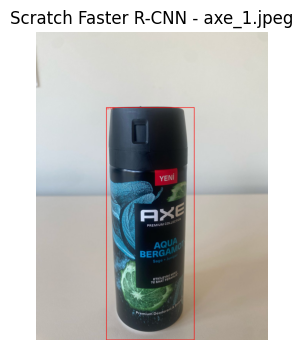

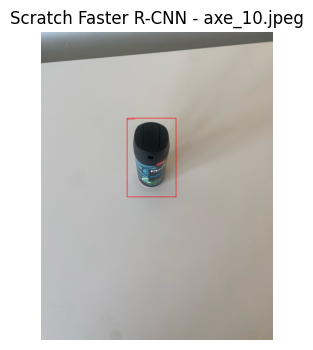

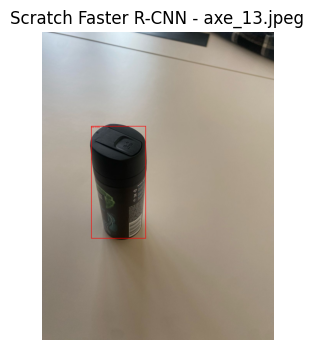

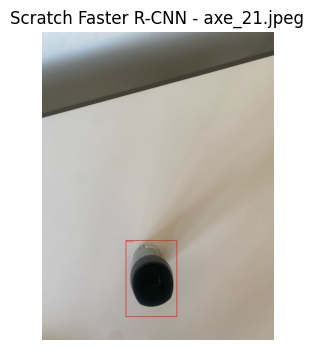

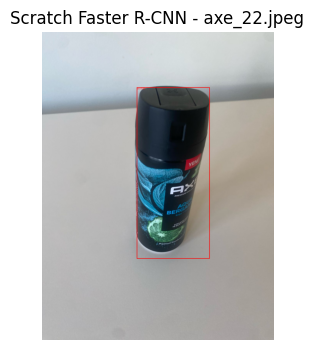

In [ ]:
#---------------------- Scratch Faster R-CNN ----------------------


# Run for scratch-trained model
run_faster_rcnn_inference("/content/drive/MyDrive/EE417_dataset/faster_rcnn_scratch.pth", "Scratch Faster R-CNN")


In [ ]:
#---------------------- YOLOv5 Fine Tuned ----------------------


!python detect.py \
  --weights runs/train/yolov5_finetuned/weights/best.pt \
  --source /content/drive/MyDrive/EE417_dataset/data/images/test \
  --conf 0.25 \
  --img 416 \
  --save-txt \
  --save-conf \
  --name yolov5_finetuned_preds_vis \
  --save_crop


usage: detect.py [-h] [--weights WEIGHTS [WEIGHTS ...]] [--source SOURCE]
                 [--data DATA] [--imgsz IMGSZ [IMGSZ ...]]
                 [--conf-thres CONF_THRES] [--iou-thres IOU_THRES]
                 [--max-det MAX_DET] [--device DEVICE] [--view-img]
                 [--save-txt] [--save-format SAVE_FORMAT] [--save-csv]
                 [--save-conf] [--save-crop] [--nosave]
                 [--classes CLASSES [CLASSES ...]] [--agnostic-nms]
                 [--augment] [--visualize] [--update] [--project PROJECT]
                 [--name NAME] [--exist-ok] [--line-thickness LINE_THICKNESS]
                 [--hide-labels] [--hide-conf] [--half] [--dnn]
                 [--vid-stride VID_STRIDE]
detect.py: error: unrecognized arguments: --save_crop


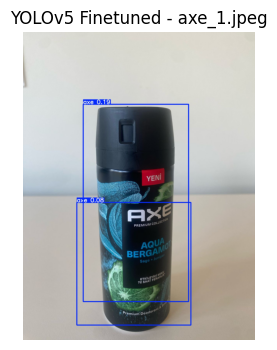

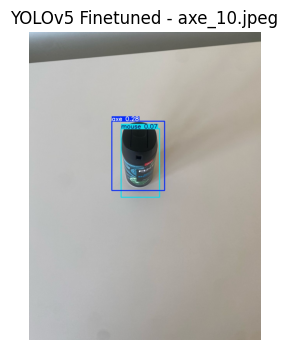

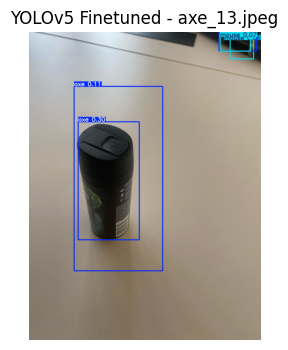

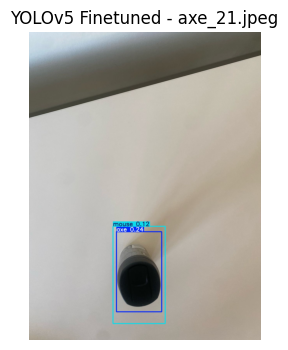

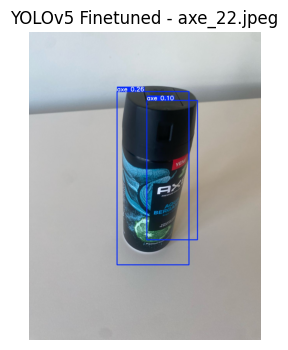

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

yolo_pred_dir = "runs/detect/yolov5_finetuned_preds"
pred_imgs = sorted([f for f in os.listdir(yolo_pred_dir) if f.endswith(".jpg") or f.endswith(".jpeg")])

for img_name in pred_imgs[:5]:
    img_path = os.path.join(yolo_pred_dir, img_name)
    img = Image.open(img_path)
    plt.figure(figsize=(6, 4))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"YOLOv5 Finetuned - {img_name}")
    plt.show()


In [ ]:
#---------------------- YOLOv5 Scratch ----------------------


!python detect.py \
  --weights runs/train/yolov5_scratch/weights/best.pt \
  --source /content/drive/MyDrive/EE417_dataset/data/images/test \
  --conf 0.25 \
  --img 416 \
  --save-txt \
  --save-conf \
  --name yolov5_scratch_preds_vis \
  --save_crop


usage: detect.py [-h] [--weights WEIGHTS [WEIGHTS ...]] [--source SOURCE]
                 [--data DATA] [--imgsz IMGSZ [IMGSZ ...]]
                 [--conf-thres CONF_THRES] [--iou-thres IOU_THRES]
                 [--max-det MAX_DET] [--device DEVICE] [--view-img]
                 [--save-txt] [--save-format SAVE_FORMAT] [--save-csv]
                 [--save-conf] [--save-crop] [--nosave]
                 [--classes CLASSES [CLASSES ...]] [--agnostic-nms]
                 [--augment] [--visualize] [--update] [--project PROJECT]
                 [--name NAME] [--exist-ok] [--line-thickness LINE_THICKNESS]
                 [--hide-labels] [--hide-conf] [--half] [--dnn]
                 [--vid-stride VID_STRIDE]
detect.py: error: unrecognized arguments: --save_crop


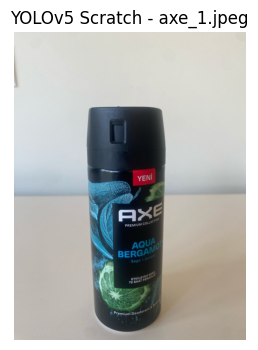

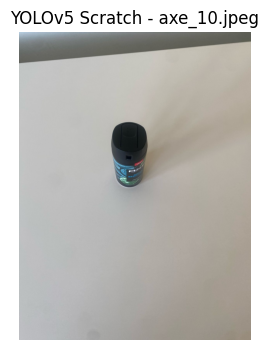

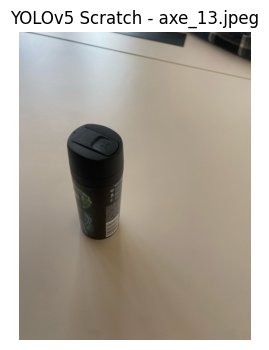

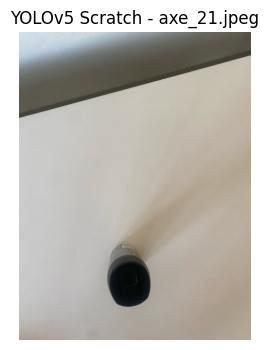

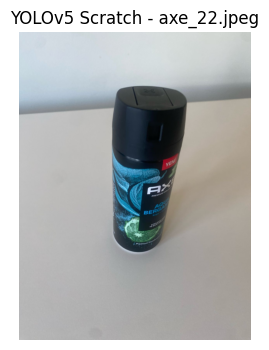

In [ ]:
yolo_pred_dir = "runs/detect/yolov5_scratch_preds"
pred_imgs = sorted([f for f in os.listdir(yolo_pred_dir) if f.endswith(".jpg") or f.endswith(".jpeg")])

for img_name in pred_imgs[:5]:
    img_path = os.path.join(yolo_pred_dir, img_name)
    img = Image.open(img_path)
    plt.figure(figsize=(6, 4))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"YOLOv5 Scratch - {img_name}")
    plt.show()
